# Importing

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [2]:
# define amplitude and snr in dB
a = 1

# scaling parameter
d = 1

# Constellation diagrams

In [3]:
# ASK
M = 4
ask = [ ( 2 * m - M + 1 ) * d for m in range( M ) ]
ask /= np.linalg.norm( ask ) / np.sqrt( M )

# PSK
M = 16
psk = [ np.exp( 1j * 2 * np.pi * m / M + 1j * np.pi / M ) for m in range( M ) ]

# QAM
M = 64
qam = [ ( 2 * m - int(np.sqrt( M ) ) + 1 ) * d  + 1j * ( 2 * n - int(np.sqrt( M ) ) + 1  ) for m in range( int(np.sqrt( M ) )) for n in range( int(np.sqrt(M) )) ]
qam /= np.linalg.norm( qam ) / np.sqrt( M )

# Choose constellation and add noise

In [4]:
# set modulation symbols 
# NOTE: this is where the modulation scheme is chosen!
syms = qam

# number of constellation points
N_trials = 1000

# generate Tx signal
# NOTE: np.random.choice( ) chooses elements of set/list provided in the args with equal probability for each element
s = np.random.choice( syms, size = N_trials )


# snr values in dB
SNR_dB_1 = 5
SNR_dB_2 = 15
SNR_dB_3 = 25
SNR_dB_4 = 100

# get noise variances
sigma2_1 = a**2 * 10**( - SNR_dB_1 / 10 )
sigma2_2 = a**2 * 10**( - SNR_dB_2 / 10 )
sigma2_3 = a**2 * 10**( - SNR_dB_3 / 10 )
sigma2_4 = a**2 * 10**( - SNR_dB_4 / 10 )


# generate and add noise
# NOTE: pre-factor sqrt( sigma2 ) for according noise variance and sqrt( 1/2 ) since complex noise is used
n = np.random.randn( N_trials ) + 1j * np.random.randn( N_trials )

r_1 = s + np.sqrt( sigma2_1 / 2) * n
r_2 = s + np.sqrt( sigma2_2 / 2) * n
r_3 = s + np.sqrt( sigma2_3 / 2) * n
r_4 = s + np.sqrt( sigma2_4 / 2) * n

# Plotting

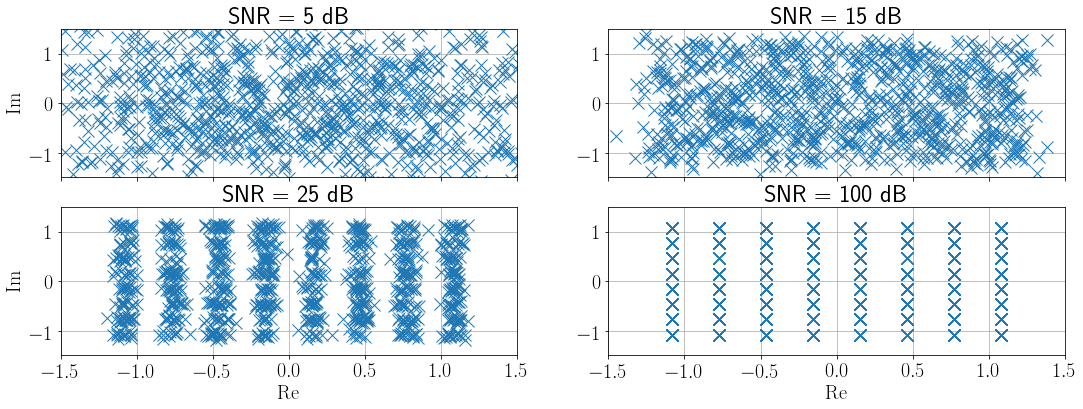

In [5]:
plt.subplot(221)
plt.plot( np.real( r_1 ), np.imag( r_1 ), 'x', markersize = 12  )

curr_ax = plt.gca()
curr_ax.set_xticklabels([])

plt.ylabel('$\mathrm{Im}$')
plt.title('SNR = ' + str(SNR_dB_1) + ' dB')
plt.xlim( (-1.5, 1.5) )
plt.ylim( (-1.5, 1.5) )
plt.grid(True)


plt.subplot(222)
plt.plot( np.real( r_2 ), np.imag( r_2 ), 'x', markersize = 12 )

curr_ax = plt.gca()
curr_ax.set_xticklabels([])

plt.title('SNR = ' + str(SNR_dB_2) + ' dB')
plt.xlim( (-1.5, 1.5) )
plt.ylim( (-1.5, 1.5) )
plt.grid(True)    


plt.subplot(223)
plt.plot( np.real( r_3 ), np.imag( r_3 ), 'x', markersize = 12  )

plt.xlabel('$\mathrm{Re}$')
plt.ylabel('$\mathrm{Im}$')
plt.title('SNR = ' + str(SNR_dB_3) + ' dB')
plt.xlim( (-1.5, 1.5) )
plt.ylim( (-1.5, 1.5) )
plt.grid(True)


plt.subplot(224)
plt.plot( np.real( r_4 ), np.imag( r_4 ), 'x', markersize = 12  )

plt.xlabel('$\mathrm{Re}$')
plt.title('SNR = ' + str(SNR_dB_4) + ' dB')
plt.xlim( (-1.5, 1.5) )
plt.ylim( (-1.5, 1.5) )
plt.grid(True)
